# Life Expectancy and GDP (portfolio project)

## introduction
For this project, we will be looking at data from World Health Organization and the World Bank regarding life expectancy and GDP. 

## importing and exploring the data

In [78]:
# import what we need for this project
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [20]:
data = pd.read_csv("all_data.csv") #import the csv 
print(data.head()) #get first five rows of data
print(data.info()) #get info on column names and data types

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [21]:
data["Country"].unique() #find what countries are in the dataset

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [22]:
data["Year"].unique() #find what years are in the dataset

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015])

From briefly looking at the data, we can see that we have 4 columns:

- Country : The name of the country
- Year : The year the data was collected
- Life expectancy at birth (years) : Life expectancy for citizens of that country that year
- GDP : The Gross Domestic Product of the country that year (in Trillions of US dollars / represented as an exponent)
 
Within the file, there is data for 6 countries spanning 16 years from 2000-2015. The countries are Chile, China, Germany, Mexico, US, and Zimbabwe.
 
Let's frame some questions we might want answered by this data:
- Whats the richest country?
- Whats the poorest country?
- What country saw the most GDP growth over the 16 years?
- What country has the highest avg GDP (over the 16 yrs)?
- What country has the lowest avg GDP (over the 16 yrs)?
- What country has the highest avg life expec (over the 16 yrs)?
- What country has the lowest avg life expec (over the 16 yrs)?
- Is GDP correlated with life expectancy?

## analyzing the data

In [113]:
#now lets seperate the data by country
chile_data = data[data["Country"]=="Chile"]
china_data = data[data["Country"]=="China"]
germany_data = data[data["Country"]=="Germany"]
mexico_data = data[data["Country"]=="Mexico"]
us_data = data[data["Country"]=="United States of America"]
zimbabwe_data = data[data["Country"]=="Zimbabwe"]

In [24]:
#we can get min, max, avg calcs from one built in function
#chile_data.describe()

In [25]:
#china_data.describe()

In [26]:
#germany_data.describe()

In [27]:
#mexico_data.describe()

In [28]:
#us_data.describe()

In [29]:
#zimbabwe_data.describe()

In [30]:
#we can find out what country had the most GDP growth by subtracting the min from the max GDP
chile_growth = max(chile_data["GDP"]) - min(chile_data["GDP"])
china_growth = max(china_data["GDP"]) - min(china_data["GDP"])
germany_growth = max(germany_data["GDP"]) - min(germany_data["GDP"])
mexico_growth = max(mexico_data["GDP"]) - min(mexico_data["GDP"])
us_growth = max(us_data["GDP"]) - min(us_data["GDP"])
zimbabwe_growth = max(zimbabwe_data["GDP"]) - min(zimbabwe_data["GDP"])

In [104]:
#show the amount of GDP growth over the 16 years
print("Chile's growth was: " + str(chile_growth))
print("China's growth was: " + str(china_growth))
print("Germany's growth was: " + str(germany_growth))
print("Mexico's growth was: " + str(mexico_growth))
print("America's growth was: " + str(us_growth))
print("Zimbabwe's growth was: " + str(zimbabwe_growth))

Chile's growth was: 208647188565.0
China's growth was: 9853350000000.0
Germany's growth was: 1940660000000.0
Mexico's growth was: 614812000000.0
America's growth was: 7800000000000.0
Zimbabwe's growth was: 11888965007.0


In [124]:
#double check which is min/max since it is hard to read those long numbers
#print(min([chile_growth, china_growth, germany_growth, mexico_growth, us_growth, zimbabwe_growth]))
#print(max([chile_growth, china_growth, germany_growth, mexico_growth, us_growth, zimbabwe_growth]))

#find the percentage of growth
zimbabwe_data.reset_index()
zim_start_gdp = zimbabwe_data.iloc[0, 3]
print("Zimbabwe's growth percentage was: " + str(round((zimbabwe_growth/zim_start_gdp)*100, 2)))
china_data.reset_index()
china_start_gdp = china_data.iloc[0, 3]
print("China's growth percentage was: " + str(round((china_growth/china_start_gdp)*100, 2)))

Zimbabwe's growth percentage was: 177.71
China's growth percentage was: 813.42


## visualizations
Now that we have all of our numbers, let's create some visualizations to aid in our understanding of the data.

Text(0.5, 1.0, 'Zimbabwe')

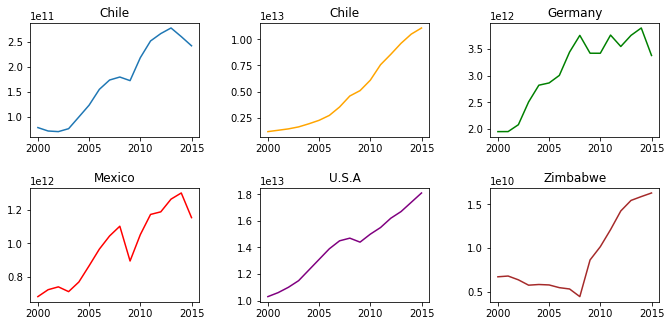

In [156]:
#create line graphs for all countries' GDP
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,5))
fig.tight_layout(pad=3.0)
ax1.plot(chile_data["Year"], chile_data["GDP"])
ax1.set_title("Chile")
ax2.plot(china_data["Year"], china_data["GDP"], color="orange")
ax2.set_title("Chile")
ax3.plot(germany_data["Year"], germany_data["GDP"], color="green")
ax3.set_title("Germany")
ax4.plot(mexico_data["Year"], mexico_data["GDP"], color="red")
ax4.set_title("Mexico")
ax5.plot(us_data["Year"], us_data["GDP"], color="purple")
ax5.set_title("U.S.A")
ax6.plot(zimbabwe_data["Year"], zimbabwe_data["GDP"], color="brown")
ax6.set_title("Zimbabwe")


<Figure size 432x288 with 0 Axes>

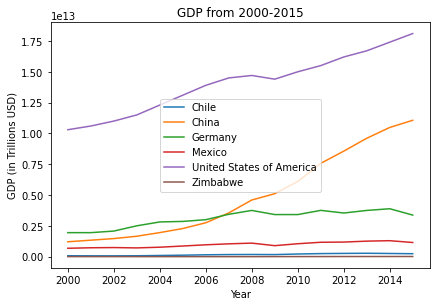

In [126]:
#line graph comparing all countries' GDP in one graph
plt.clf()
fig, ax = plt.subplots()
plt.tight_layout()
plt.plot(chile_data["Year"], chile_data["GDP"])
plt.plot(china_data["Year"], china_data["GDP"])
plt.plot(germany_data["Year"], germany_data["GDP"])
plt.plot(mexico_data["Year"], mexico_data["GDP"])
plt.plot(us_data["Year"], us_data["GDP"])
plt.plot(zimbabwe_data["Year"], zimbabwe_data["GDP"])
plt.xlabel("Year")
plt.ylabel("GDP (in Trillions USD)")
plt.legend(data.Country.unique())
plt.title("GDP from 2000-2015")
plt.show()

From this graph we can see that US GDP had the steadiest increase over time, while China saw an abrupt increase starting around 2006/2007. 

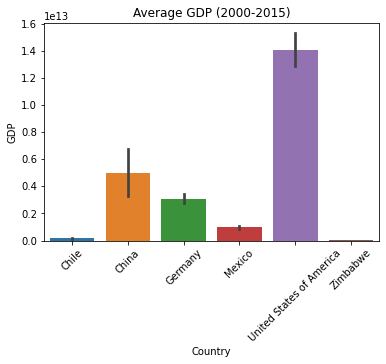

In [82]:
#bar graph of all countries' GDP averaged over the 16 years.
plt.clf()
sns.barplot(data=data, x="Country", y="GDP")
plt.xticks(rotation=45)
plt.title("Average GDP (2000-2015)")
plt.show()

This bar graph makes the GDP difference and the other countries even more stark. Zimbabwe's GDP is clearly the lowest, as it is barely visible on the graph.

Text(0.5, 1.0, 'Zimbabwe')

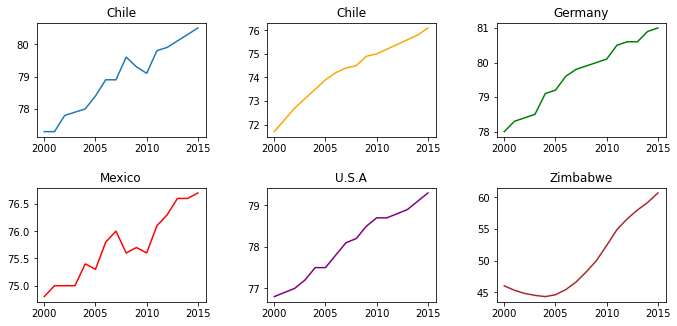

In [157]:
#create line graphs for all countries' life expectancy
plt.clf()
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(10,5))
fig.tight_layout(pad=3.0)
ax1.plot(chile_data["Year"], chile_data["Life expectancy at birth (years)"])
ax1.set_title("Chile")
ax2.plot(china_data["Year"], china_data["Life expectancy at birth (years)"], color="orange")
ax2.set_title("Chile")
ax3.plot(germany_data["Year"], germany_data["Life expectancy at birth (years)"], color="green")
ax3.set_title("Germany")
ax4.plot(mexico_data["Year"], mexico_data["Life expectancy at birth (years)"], color="red")
ax4.set_title("Mexico")
ax5.plot(us_data["Year"], us_data["Life expectancy at birth (years)"], color="purple")
ax5.set_title("U.S.A")
ax6.plot(zimbabwe_data["Year"], zimbabwe_data["Life expectancy at birth (years)"], color="brown")
ax6.set_title("Zimbabwe")



<Figure size 432x288 with 0 Axes>

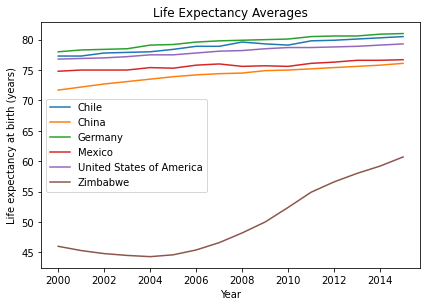

In [127]:
#line graph comparing all countries' life expectancy
plt.clf()
fig, ax = plt.subplots()
plt.tight_layout()
plt.plot(chile_data["Year"], chile_data["Life expectancy at birth (years)"])
plt.plot(china_data["Year"], china_data["Life expectancy at birth (years)"])
plt.plot(germany_data["Year"], germany_data["Life expectancy at birth (years)"])
plt.plot(mexico_data["Year"], mexico_data["Life expectancy at birth (years)"])
plt.plot(us_data["Year"], us_data["Life expectancy at birth (years)"])
plt.plot(zimbabwe_data["Year"], zimbabwe_data["Life expectancy at birth (years)"])
plt.xlabel("Year")
plt.ylabel("Life expectancy at birth (years)")
plt.legend(data.Country.unique())
plt.title("Life Expectancy Averages")
plt.show()

Here we can see all countries had slight increases in life expectancy over the 16 years, but Zimbabwe had the most dramatic increase starting from 2005. However, by 2015, it is still considerably lower than the other countries presented in the data. Also interesting to note is the dip in life expectancy in Zimbabwe around 2000-2004.

From this analysis we can answer a few of our previously asked questions.
- The richest country (the country with the highest max GDP) is the US (1.810000e+13)
- The poorest country (the country with the lowest min GDP) is Zimbabwe (4.415703e+09)
- The country that saw the most GDP growth over the 16 years was China with 9,853,350,000,000.00
- The country with the highest average GDP is the US (1.407500e+13)
- The country with the lowest average GDP is Zimbabwe (9.062580e+09)
- The country with the highest average life expectancy is Germany with 79.7
- The country with the lowest agerage life expectancy is Zimbabwe with 50.1

## hypothesis testing
Our final question requires some hypothesis testing in order to answer it.
- Is GDP correlated with life expectancy?

We can use a chi-square test in order to find out whether there is a correlation between GDP and life expectancy or whether any perceived correlation is the result of random chance. 

In [33]:
# import test
from scipy.stats import chi2_contingency
 
# create contingency table
ab_contingency = pd.crosstab(data["Life expectancy at birth (years)"], data["GDP"])

# run a Chi-Square test
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval) #if the result is less than .05, the correlation is significant.

0.2735814830997412


It looks like there is no significant correlation between GDP and life expectancy with regards to the data we have been given.

## conclusions

Let's go over the questions we had answered through our analysis
- The richest country (the country with the highest max GDP) was the US (1.810000e+13)
- The poorest country (the country with the lowest min GDP) was Zimbabwe (4.415703e+09)
- The country that saw the most GDP growth over the 16 years was China with 9,853,350,000,000.00
- The country with the highest average GDP was the US (1.407500e+13)
- The country with the lowest average GDP was Zimbabwe (9.062580e+09)
- The country with the highest average life expectancy was Germany with 79.7
- The country with the lowest agerage life expectancy was Zimbabwe with 50.1
- There is no significant correlation between GDP and life expectancy to be found in this set of data

## further research / appendix
- What happened in 2006/2007 that caused China's sudden GDP growth?
- What things occurred in Zimbabwe that caused the dip and then rebound of their life expectancy?
- What is the relationship between GDP and life expectancy?
Ideas for additional research:
- What is the infant mortality rate for each country, and how does it effect their average life expectancy?
- How would the statistics on life expectancy differ between genders within each country?
- What percentage of GDP is invested in healthcare by each country?
- What are statistics on causes of death within each country?
- How has any of the information changed in the years (2015 to present) that followed?